PRE REQUISITES AND DATA ADDITION

In [4]:
!pip install tensorflow pandas matplotlib sklearn

In [5]:
import os
import pandas as pd
import tensorflow as tf

import numpy as np

In [6]:
import pandas as pd

In [7]:
os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv','train.csv')

'jigsaw-toxic-comment-classification-challenge\\train.csv\\train.csv'

In [8]:
df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))

In [9]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# 1. Preprocess

In [8]:
!pip list

Package                      Version
---------------------------- ----------
absl-py                      1.4.0
aiofiles                     22.1.0
aiosqlite                    0.18.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asgiref                      3.5.2
asttokens                    2.0.5
astunparse                   1.6.3
attrs                        22.2.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.0
bleach                       6.0.0
cachetools                   5.3.0
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           3.1.0
click                        8.1.3
colorama                     0.4.4
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.0
decorator                    5.1.1
defusedxml                   0.7.1


In [10]:
from tensorflow.keras.layers import TextVectorization

In [11]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [12]:
MAX_FEATURES = 200000 # number of words in the vocab

In [13]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [14]:
vectorizer.adapt(X.values)

In [15]:
vectorized_text = vectorizer(X.values)

In [16]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [17]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

# 2. Create Sequential Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [19]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [20]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [25]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 10844s 2s/step - loss: 0.0463 - val_loss: 0.0421


In [26]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

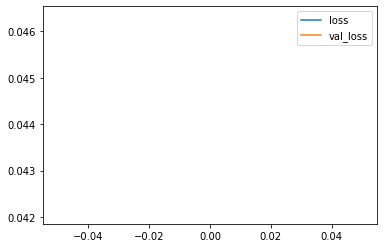

In [27]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3. Make Predictions

In [28]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [30]:
model.predict(np.array([input_text]))

1/1 [==============================] - 1s 1s/step


array([[0.98106295, 0.12735647, 0.80941266, 0.03701746, 0.6821674 ,
        0.12160724]], dtype=float32)

In [33]:
batch = test.as_numpy_iterator().next()

In [35]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [36]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 272ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [38]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 151ms/step


In [41]:
res.flatten()

array([0.98106295, 0.12735647, 0.80941266, 0.03701746, 0.6821674 ,
       0.12160724], dtype=float32)

# 4. Evaluate Model

In [39]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [42]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 236ms/step


In [43]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9126417636871338, Recall:0.6145362257957458, Accuracy:0.5015045404434204


#APP BUILDING KRENGE USING GRADIO 



# 5. Test and Gradio

In [44]:
!pip install gradio jinja2

     -------------------------------------- 15.7/15.7 MB 812.5 kB/s eta 0:00:00
     -------------------------------------- 319.8/319.8 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 71.5/71.5 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 202.1/202.1 kB 1.4 MB/s eta 0:00:00
     ------------------------------------ 199.8/199.8 kB 934.0 kB/s eta 0:00:00
     ---------------------------------------- 50.5/50.5 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 45.7/45.7 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 57.1/57.1 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 813.6/813.6 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 57.8/57.8 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 4.6 MB/s eta 0:00:00
     -------------

In [46]:
import tqdm as notebook_tqdm

In [3]:
import tensorflow as tf
import gradio as gr

C:\Users\Anupam\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
model.save('toxicity1.h5')

NameError: name 'model' is not defined

In [51]:
model = tf.keras.models.load_model('toxicity1.h5')

In [52]:
input_str = vectorizer('hey i freaken hate you!')

In [53]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 2s 2s/step


In [54]:
res

array([[0.6414225 , 0.0041328 , 0.08819883, 0.02093166, 0.22260176,
        0.04464832]], dtype=float32)

In [55]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [2]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

NameError: name 'gr' is not defined

In [1]:
interface.launch(share=True)

NameError: name 'interface' is not defined